#<h1 align="center">Appendix A</h1>
<h2 align="center">Impact of Social Factors on Final Grades</h2>
<h3 align="center">Name: Maha Jayapal</h3>
<h4 align="center">Date: 6/24/2024</h4>

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
file_path = '/content/sample_data/student-por.csv'
student_por = pd.read_csv(file_path,  delimiter=';')

# Display the first few rows of the dataset
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
file_path = '/content/sample_data/student-mat.csv'
student_math = pd.read_csv(file_path,  delimiter=';')

# Display the first few rows of the dataset
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(student_math.shape)
student_por.shape

(395, 33)


(649, 33)

There are 395 observations in the Math dataset, and 649 observations in the portuguese dataset.

**Features used to analyze the grade impact based on social life:**

internet:	Binary,		Internet access at home (binary: yes or no)

romantic:	Binary,		with a romantic relationship (binary: yes or no)

famrel:	Integer, 	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime:	Integer, 	free time after school (numeric: from 1 - very low to 5 - very high)

goout: Integer,		going out with friends (numeric: from 1 - very low to 5 - very high)

absences:	Integer,		number of school absences (numeric: from 0 to 93)

In [5]:
selected_columns = ['internet' ,'romantic', 'famrel' , 'freetime' , 'goout' ,'absences']

subset_stu_por = student_por[selected_columns]
subset_stu_math = student_math[selected_columns]

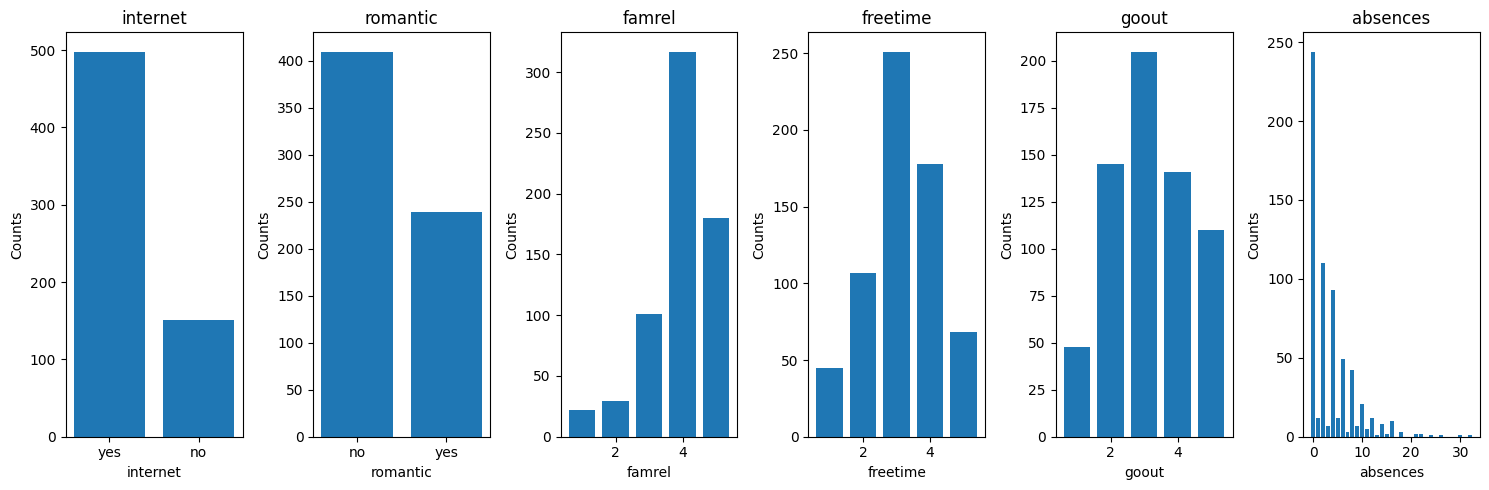

In [6]:
def draw_barplots(df, num_columns):
    # Get the specified number of columns
    columns = df.columns[:num_columns]

    # Create subplots with the specified number of columns
    fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))

    # Iterate through the columns and draw bar plots
    for i, col in enumerate(columns):
        ax = axes[i] if num_columns > 1 else axes
        value_counts = df[col].value_counts()
        ax.bar(value_counts.index, value_counts.values)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel('Counts')

    plt.tight_layout()
    plt.show()


draw_barplots(subset_stu_por, 6)


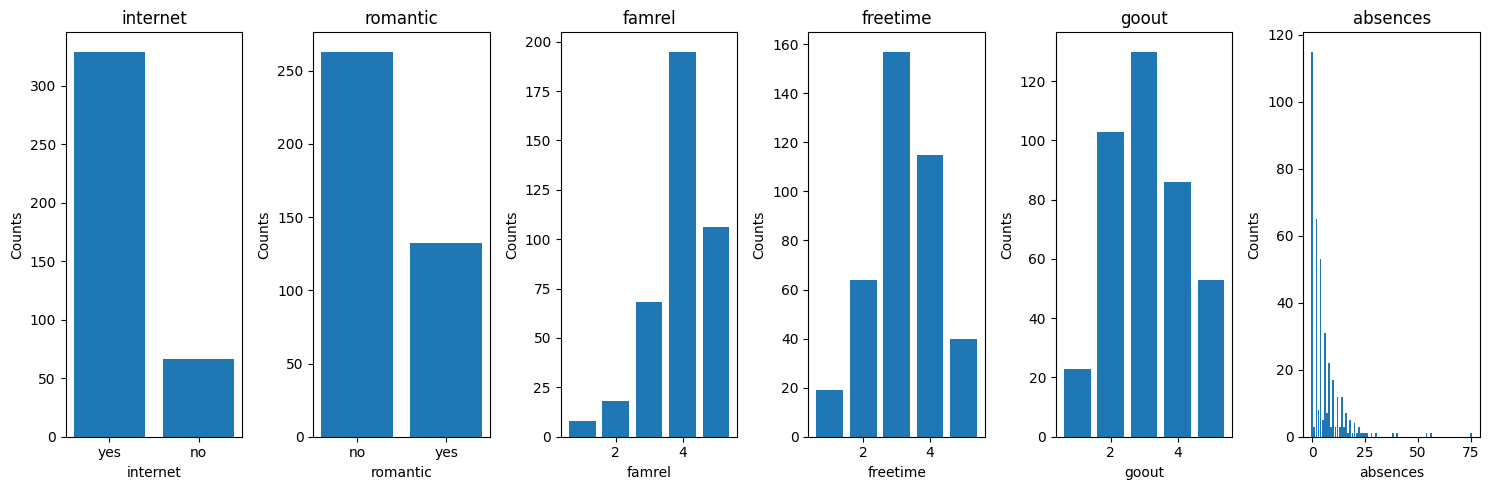

In [10]:
draw_barplots(subset_stu_math, 6)

The bar plots for the selected features revealed several insights. For both the datasets, more number of students have internet access at home, fewer students were in romantic relationships, and family relationships were left-skewed, indicating mostly positive family dynamics. Free time and going out showed roughly normal distributions, while absences were heavily right-skewed with mostly low values and few high values.

In [7]:
print(student_math[selected_columns].dtypes)
print(student_por[selected_columns].dtypes)

internet    object
romantic    object
famrel       int64
freetime     int64
goout        int64
absences     int64
dtype: object
internet    object
romantic    object
famrel       int64
freetime     int64
goout        int64
absences     int64
dtype: object


The feature

In [8]:
X_math = student_math[selected_columns]
X_math.head(5)

,internet,romantic,famrel,freetime,goout,absences
0,no,no,4,3,4,6
1,yes,no,5,3,3,4
2,yes,no,4,3,2,10
3,yes,yes,3,2,2,2
4,no,no,4,3,2,4


Among the six independent features selected, internet and romantic are binary, famrel which is the quality of family relationships, freetime which is the free time after school, goout is going out with friends which are all ordinal numeric variables ranging from 1 which is very bad or low to 5 which is excellent or very high. The variable absences is a numeric variable ranging from 0 to 93 which is the number of school absences.


In [13]:
# Create a dictionary mapping 'yes' to 1 and 'no' to 0
mapping = {'yes': 1, 'no': 0}

# Replace values in the 'answer' column using the dictionary
student_math['internet'] = student_math['internet'].replace(mapping)
student_math['romantic'] = student_math['romantic'].replace(mapping)

student_por['internet'] = student_por['internet'].replace(mapping)
student_por['romantic'] = student_por['romantic'].replace(mapping)

The target variable G3 is an integer. Independent variables famrel, freetime, goout, and absences were numeric, while internet and romantic were categorical with yes and no. These were converted to 1 and 0 for modeling.



In [14]:
X_math = student_math[selected_columns]
X_math.head(5)

,internet,romantic,famrel,freetime,goout,absences
0,0,0,4,3,4,6
1,1,0,5,3,3,4
2,1,0,4,3,2,10
3,1,1,3,2,2,2
4,0,0,4,3,2,4


In [15]:
X_math.dtypes

internet    int64
romantic    int64
famrel      int64
freetime    int64
goout       int64
absences    int64
dtype: object

In [16]:
correlation_matrix = X_math.corr()
correlation_matrix

,internet,romantic,famrel,freetime,goout,absences
internet,1.000000,0.087122,0.032768,0.051286,0.074370,0.101701
romantic,0.087122,1.000000,-0.063816,-0.011182,0.007870,0.153384
famrel,0.032768,-0.063816,1.000000,0.150701,0.064568,-0.044354
freetime,0.051286,-0.011182,0.150701,1.000000,0.285019,-0.058078
goout,0.074370,0.007870,0.064568,0.285019,1.000000,0.044302
absences,0.101701,0.153384,-0.044354,-0.058078,0.044302,1.000000


The correlation matrix shows that the features selected does not have multicollinearity.

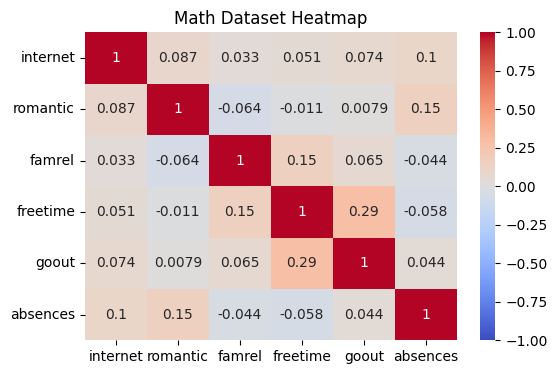

In [20]:
# Create the heat map
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Math Dataset Heatmap')

# Display the heat map
plt.show()

In [21]:
X_por = student_por[selected_columns]
X_por.head(5)

,internet,romantic,famrel,freetime,goout,absences
0,0,0,4,3,4,4
1,1,0,5,3,3,2
2,1,0,4,3,2,6
3,1,1,3,2,2,0
4,0,0,4,3,2,0


In [22]:
correlation_matrix = X_por.corr()
correlation_matrix

,internet,romantic,famrel,freetime,goout,absences
internet,1.000000,0.034832,0.082214,0.063268,0.092869,0.067301
romantic,0.034832,1.000000,-0.044920,0.027112,-0.000520,0.079489
famrel,0.082214,-0.044920,1.000000,0.129216,0.089707,-0.089534
freetime,0.063268,0.027112,0.129216,1.000000,0.346352,-0.018716
goout,0.092869,-0.000520,0.089707,0.346352,1.000000,0.085374
absences,0.067301,0.079489,-0.089534,-0.018716,0.085374,1.000000


The correlation matrix shows that the features selected does not have multicollinearity.

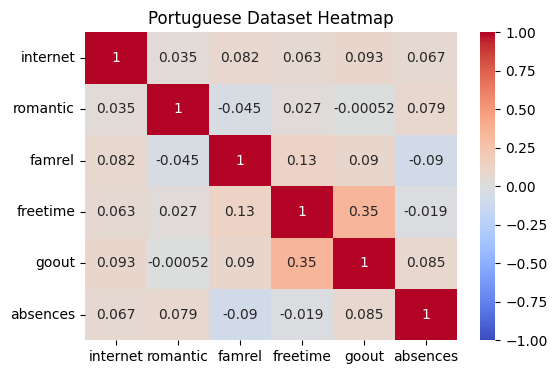

In [26]:
# Create the heat map
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Portuguese Dataset Heatmap')

# Display the heat map
plt.show()

In [27]:
X_math = student_math[selected_columns]
y_math = student_math["G3"]

X_math = sm.add_constant(X_math)

model = sm.OLS(y_math, X_math)
results = model.fit()

params = results.params
params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.809
Date:                Thu, 20 Jun 2024   Prob (F-statistic):            0.00106
Time:                        21:51:42   Log-Likelihood:                -1149.9
No. Observations:                 395   AIC:                             2314.
Df Residuals:                     388   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9966      1.339      7.466      0.000       7.364      12.629
internet       1.3893      0.612      2.269      0.024       0.186       2.593
romantic      -1.3960      0.486     -2.870      0.004      -2.352      -0.439
famrel         0.2265      0.256      0.885      0.377      -0.276       0.729
freetime       0.2094      0.239      0.876      0.382      -0.261       0.679
goout         -0.6521      0.213     -3.067      0.002      -1.070      -0.234
absences       0.0323      0.029      1.121      0.263      -0.024       0.089
==============================================================================
Omnibus:                       26.878   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.518
Skew:                          -0.671   Prob(JB):                     2.36e-07
Kurtosis:                       3.236   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared value of 0.056 indicates that approximately 5.6% of the variance in the dependent variable can be explained by the independent variables included in your model. A low R-squared value like 0.056 suggests that the model has a weak explanatory power. The independent variables don't explain a large proportion of the variation in the dependent variable.

The adjusted R-squared (0.041) is even lower than the R-squared, indicating that the model might be suffering from overfitting. The inclusion of additional independent variables might not be statistically significant and might be inflating the R-squared value without a true improvement in explanatory power.

The p-value associated with the F-statistic is highly significant (less than 0.05). It indicates that the observed F-statistic value is unlikely to have occurred by chance, and we can reject the null hypothesis.

Based on the coefficients except for the romantic and goout which is inversely related to the grades, all the other features selected has a positive relationship with the dependent variable.

In [46]:
X_por = student_por[selected_columns]
y_por = student_por["G3"]

X_por = sm.add_constant(X_por)

model = sm.OLS(y_por, X_por)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     7.352
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           1.28e-07
Time:                        18:49:46   Log-Likelihood:                -1659.9
No. Observations:                 649   AIC:                             3334.
Df Residuals:                     642   BIC:                             3365.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2653      0.673     18.227      0.000      10.944      13.587
internet       1.2768      0.295      4.332      0.000       0.698       1.855
romantic      -0.5593      0.257     -2.178      0.030      -1.064      -0.055
famrel         0.1988      0.131      1.513      0.131      -0.059       0.457
freetime      -0.3677      0.126     -2.918      0.004      -0.615      -0.120
goout         -0.1636      0.113     -1.450      0.147      -0.385       0.058
absences      -0.0612      0.027     -2.269      0.024      -0.114      -0.008
==============================================================================
Omnibus:                      123.806   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              336.959
Skew:                          -0.951   Prob(JB):                     6.76e-74
Kurtosis:                       5.973   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared value of 0.064 indicates that approximately 6.4% of the variance in the dependent variable can be explained by the independent variables included in your model. A low R-squared value like 0.064 suggests that the model has a weak explanatory power.

The adjusted R-squared (0.056) is even lower than the R-squared, indicating that the model might be suffering from overfitting.

The p-value associated with the F-statistic is highly significant (less than 0.05). It indicates that the observed F-statistic value is unlikely to have occurred by chance, and we can reject the null hypothesis.

While the F-statistic for both the math and portuguese student performance dataset suggests a statistically significant relationship between at least one independent variable and the dependent variable, the low R-squared and adjusted R-squared values indicate a weak model fit. The model explains a small portion of the variance, and there might be overfitting due to the inclusion of unnecessary variables.



**Feature selection to improve model performance:**

Dropping the features famrel in both the datasets which has a higher p value.

In [47]:
selected_columns = ['internet' ,'romantic' , 'freetime' , 'goout' ,'absences']


In [48]:
X_math = student_math[selected_columns]
y_math = student_math["G3"]

X_math = sm.add_constant(X_math)

model = sm.OLS(y_math, X_math)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.417
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           0.000634
Time:                        19:07:50   Log-Likelihood:                -1150.3
No. Observations:                 395   AIC:                             2313.
Df Residuals:                     389   BIC:                             2336.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7829      1.002     10.763      0.000       8.813      12.753
internet       1.4069      0.612      2.300      0.022       0.204       2.610
romantic      -1.4219      0.485     -2.929      0.004      -2.376      -0.467
freetime       0.2378      0.237      1.004      0.316      -0.228       0.703
goout         -0.6477      0.213     -3.048      0.002      -1.066      -0.230
absences       0.0315      0.029      1.095      0.274      -0.025       0.088
==============================================================================
Omnibus:                       27.551   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.401
Skew:                          -0.679   Prob(JB):                     1.52e-07
Kurtosis:                       3.251   Cond. No.                         48.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_por = student_por[selected_columns]
y_por = student_por["G3"]

X_por = sm.add_constant(X_por)

model = sm.OLS(y_por, X_por)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     8.348
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           1.16e-07
Time:                        19:08:16   Log-Likelihood:                -1661.1
No. Observations:                 649   AIC:                             3334.
Df Residuals:                     643   BIC:                             3361.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9517      0.497     26.037      0.000      11.975      13.929
internet       1.3120      0.294      4.461      0.000       0.734       1.889
romantic      -0.5762      0.257     -2.243      0.025      -1.081      -0.072
freetime      -0.3487      0.126     -2.778      0.006      -0.595      -0.102
goout         -0.1549      0.113     -1.373      0.170      -0.376       0.067
absences      -0.0650      0.027     -2.420      0.016      -0.118      -0.012
==============================================================================
Omnibus:                      123.434   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.248
Skew:                          -0.949   Prob(JB):                     1.59e-73
Kurtosis:                       5.965   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Freetime and absences have higher p values for the math dataset, goout has higher p value for the portuguese dataset. So dropping those features and checking the model performance.

In [50]:
selected_columns = ['internet' ,'romantic' , 'goout']
X_math = student_math[selected_columns]
y_math = student_math["G3"]

X_math = sm.add_constant(X_math)

model = sm.OLS(y_math, X_math)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.676
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           0.000210
Time:                        19:15:23   Log-Likelihood:                -1151.3
No. Observations:                 395   AIC:                             2311.
Df Residuals:                     391   BIC:                             2327.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4301      0.820     13.938      0.000       9.818      13.042
internet       1.4852      0.609      2.439      0.015       0.288       2.682
romantic      -1.3523      0.480     -2.816      0.005      -2.297      -0.408
goout         -0.5790      0.204     -2.845      0.005      -0.979      -0.179
==============================================================================
Omnibus:                       32.489   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.096
Skew:                          -0.736   Prob(JB):                     5.34e-09
Kurtosis:                       3.387   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
selected_columns = ['internet' ,'romantic' , 'freetime' , 'absences']
X_por = student_por[selected_columns]
y_por = student_por["G3"]

X_por = sm.add_constant(X_por)

model = sm.OLS(y_por, X_por)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     9.950
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           8.12e-08
Time:                        19:16:02   Log-Likelihood:                -1662.0
No. Observations:                 649   AIC:                             3334.
Df Residuals:                     644   BIC:                             3356.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6801      0.457     27.763      0.000      11.783      13.577
internet       1.2837      0.294      4.373      0.000       0.707       1.860
romantic      -0.5690      0.257     -2.214      0.027      -1.074      -0.064
freetime      -0.4084      0.118     -3.465      0.001      -0.640      -0.177
absences      -0.0685      0.027     -2.559      0.011      -0.121      -0.016
==============================================================================
Omnibus:                      120.536   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.008
Skew:                          -0.933   Prob(JB):                     1.19e-70
Kurtosis:                       5.902   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Even though the F statistic kept increasing after feature selection, the low R-squared and adjusted R-squared values indicate a weak model fit. With no multicollinearity between features selected, the model performance did not improve much with feature selection with respect to R squared or adjusted R squared.